In [1]:
from google.colab import drive
drive.mount('/content/driver/')

Mounted at /content/driver/


In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 9.7 MB/s eta 0:00:00


In [9]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.155 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.8/78.2 GB disk)


In [23]:
import os
import glob
# from PIL import Image
from ultralytics import YOLO
from IPython.display import Image, display

In [29]:
%cd /content/driver/MyDrive/Colab_Notebooks/Computer_Vision/Animal_Species_Detection
CUSTOM_DIR = 'custom.yaml'
!ls

/content/driver/MyDrive/Colab_Notebooks/Computer_Vision/Animal_Species_Detection
custom.yaml  data  runs  yolov8.ipynb  yolov8n.pt


In [ ]:
IMAGE_TRAIN_DIR = './data/images/train'
IMAGE_VAL_DIR = './data/images/val'
IMAGE_TEST_DIR = './data/images/test'

### Train

In [30]:
!yolo task=detect mode=train model=yolov8n.pt data=custom.yaml epochs=50 imgsz=640

Ultralytics YOLOv8.0.155 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=custom.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False

In [31]:
!ls 'runs/detect/train'

args.yaml					     train_batch1.jpg
confusion_matrix_normalized.png			     train_batch2920.jpg
confusion_matrix.png				     train_batch2921.jpg
events.out.tfevents.1692165954.6843a721d799.18830.0  train_batch2922.jpg
F1_curve.png					     train_batch2.jpg
labels_correlogram.jpg				     val_batch0_labels.jpg
labels.jpg					     val_batch0_pred.jpg
P_curve.png					     val_batch1_labels.jpg
PR_curve.png					     val_batch1_pred.jpg
R_curve.png					     val_batch2_labels.jpg
results.csv					     val_batch2_pred.jpg
results.png					     weights
train_batch0.jpg


## Visualize the training output

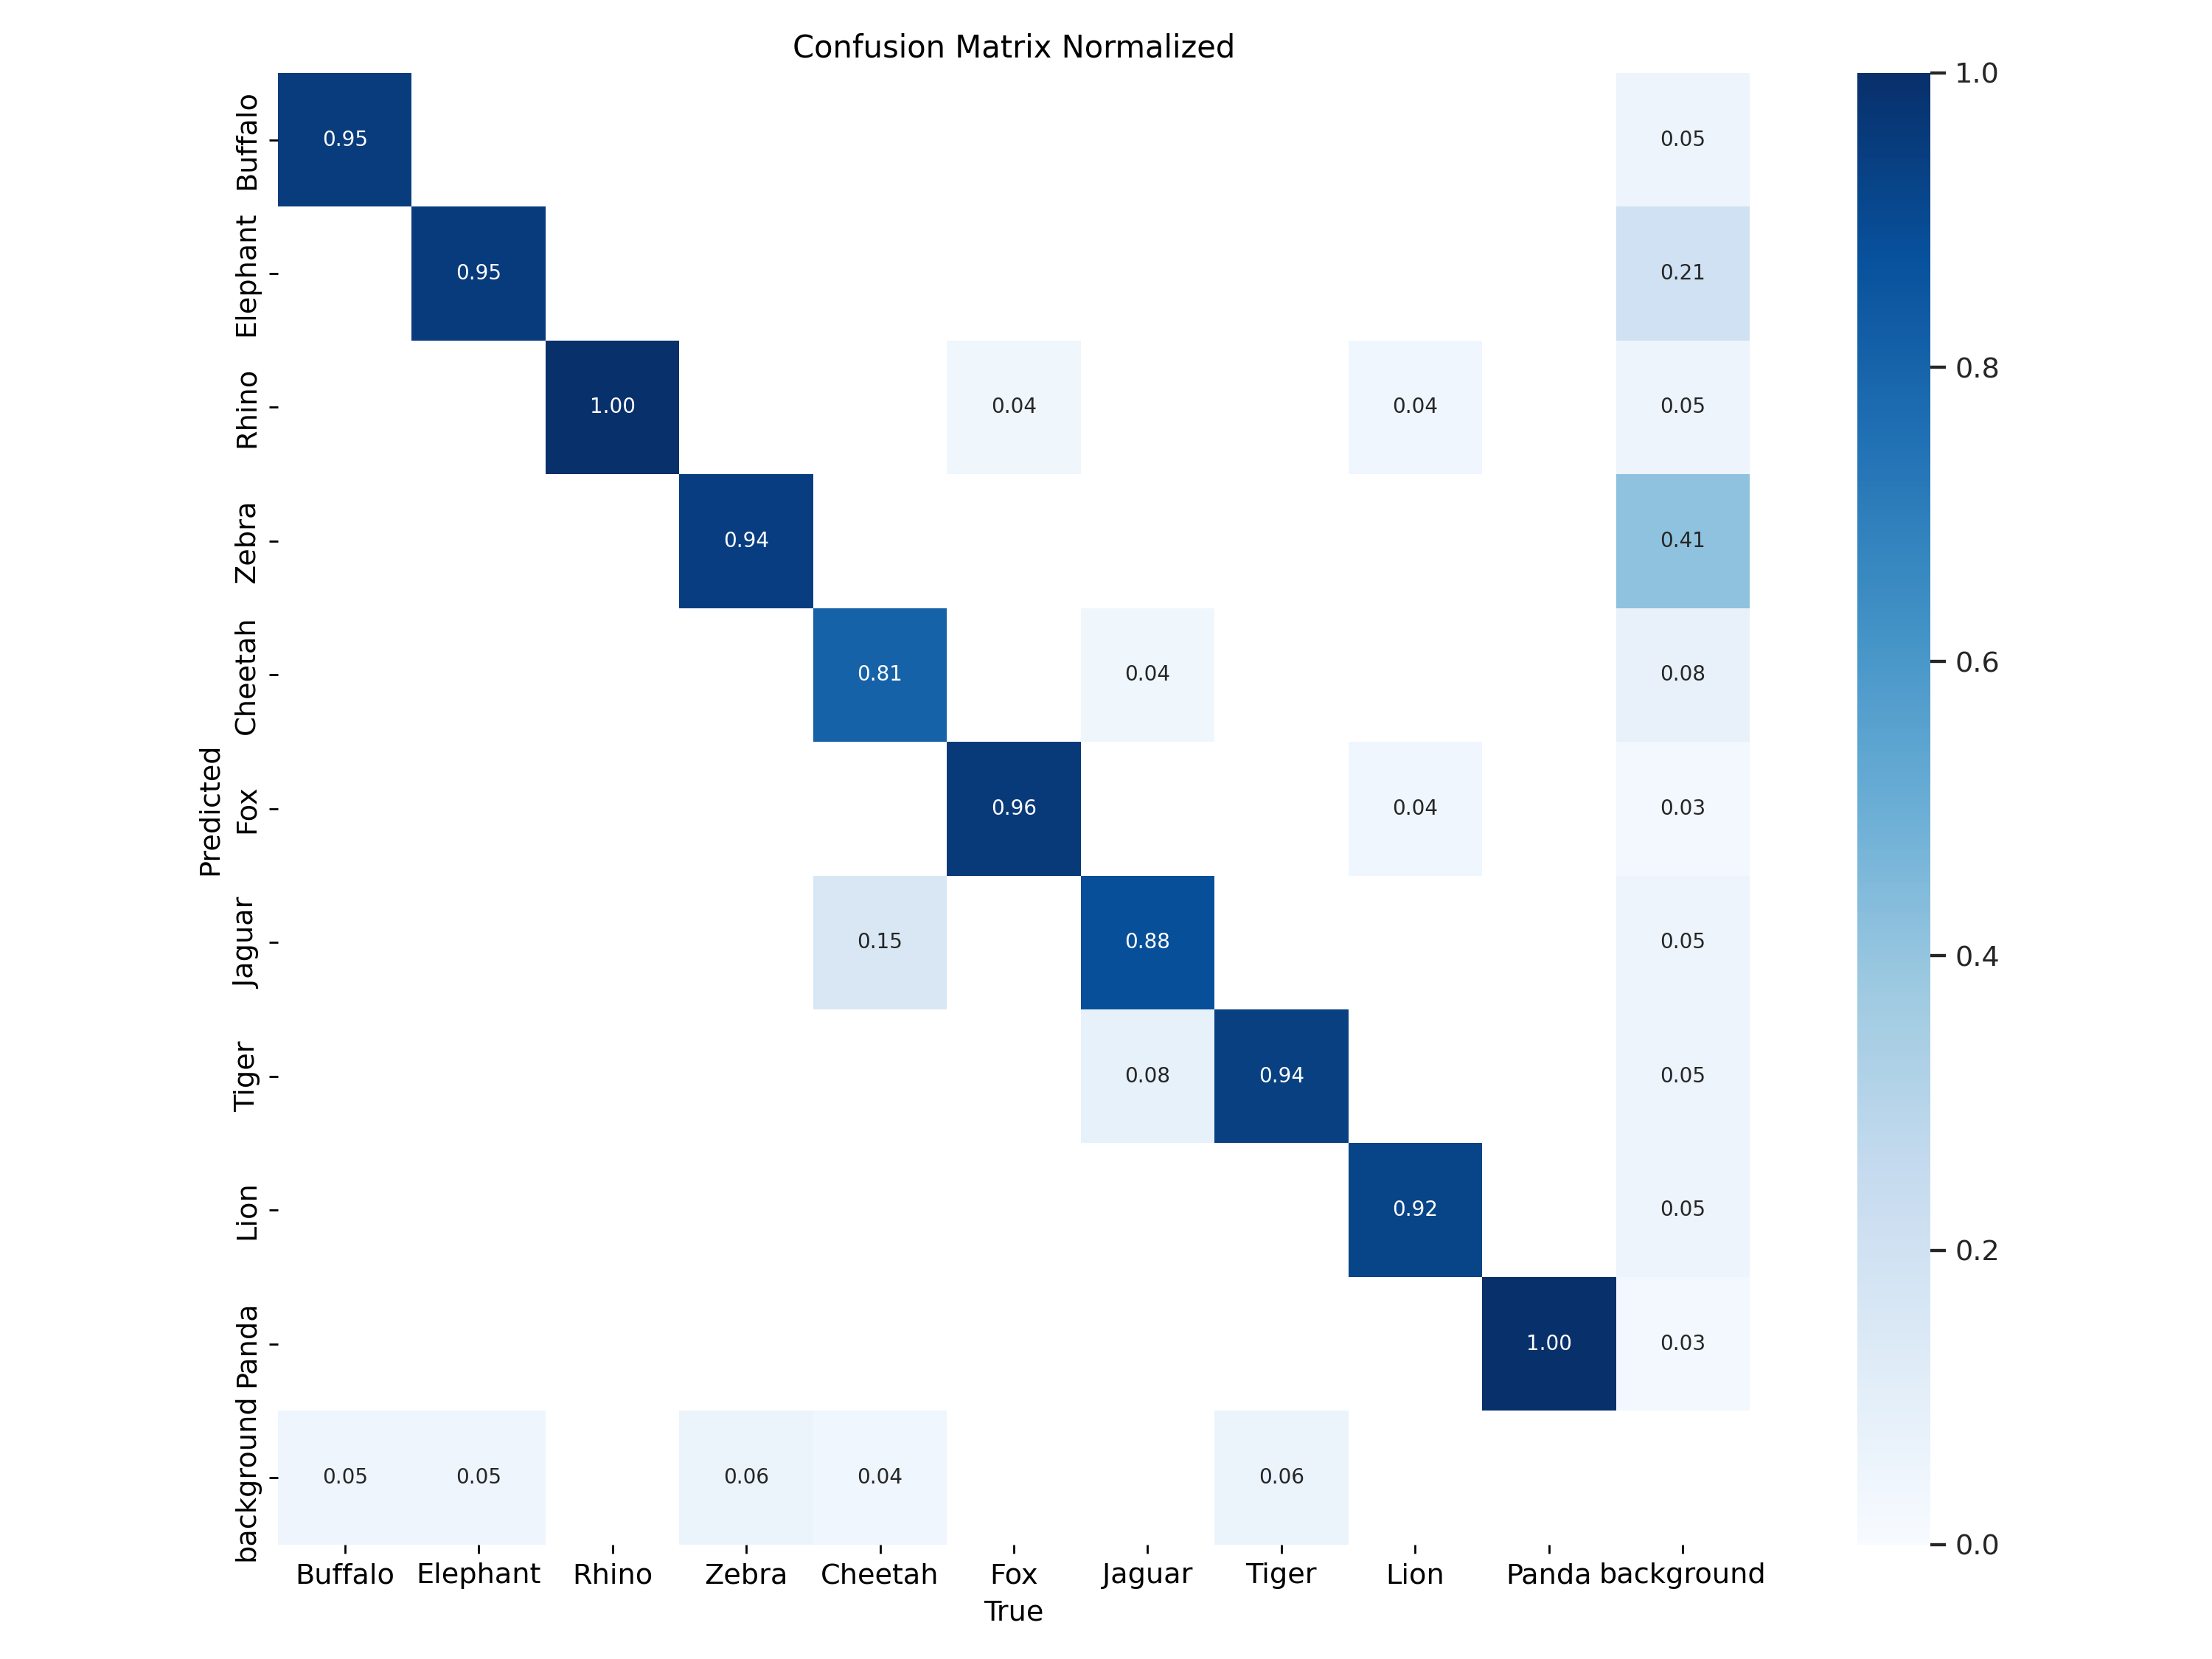

In [32]:
display(Image(filename="runs/detect/train/confusion_matrix_normalized.png", width=1000))

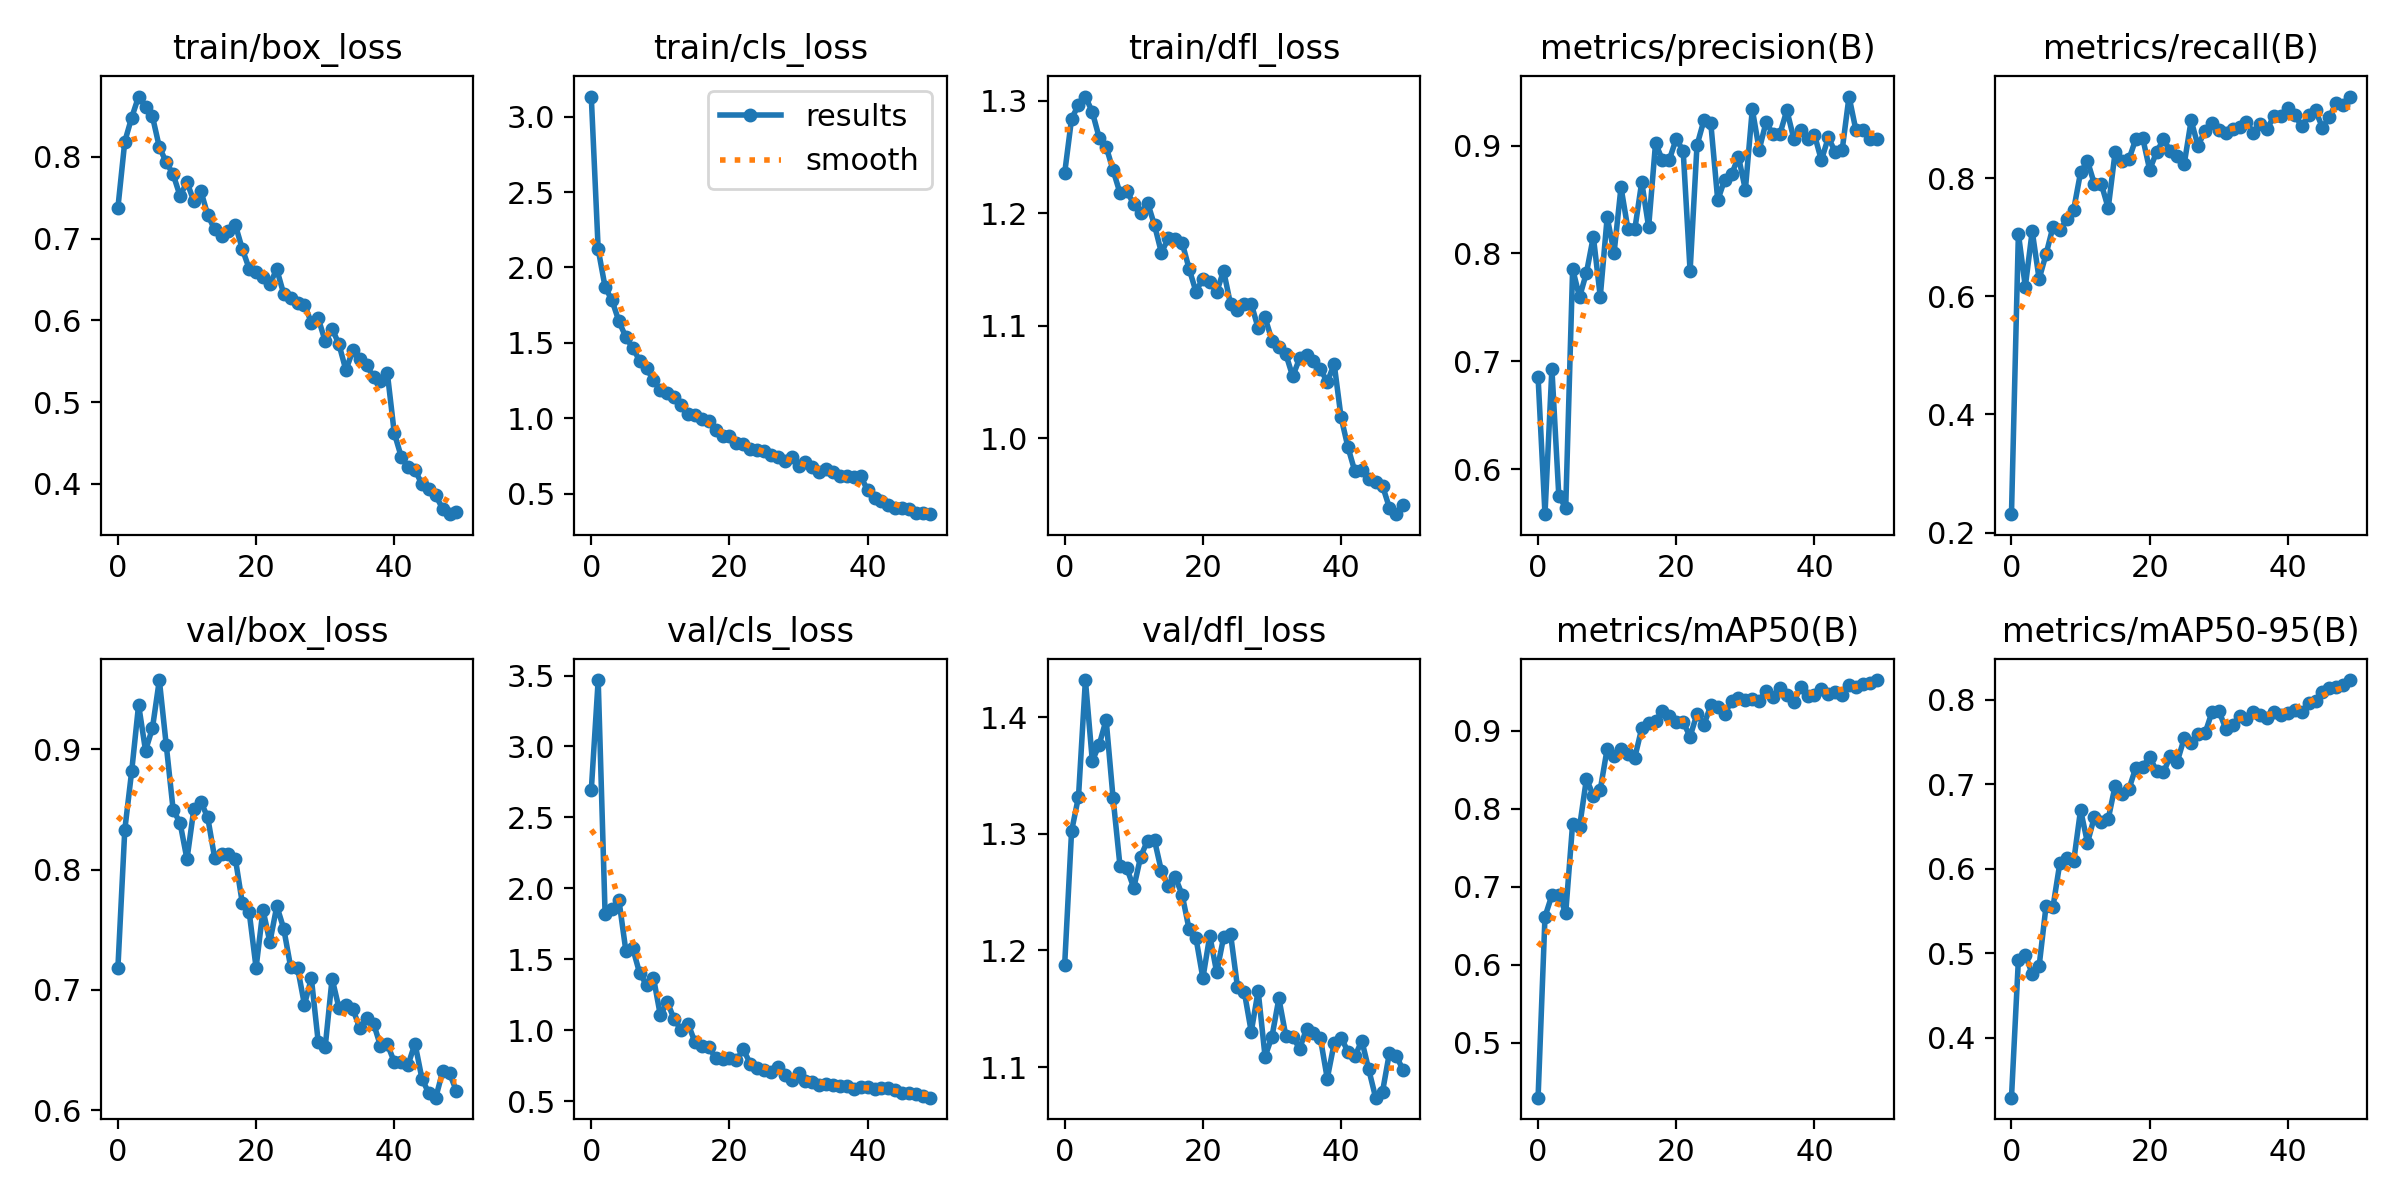

In [35]:
display(Image(filename="runs/detect/train/results.png", width=1000))

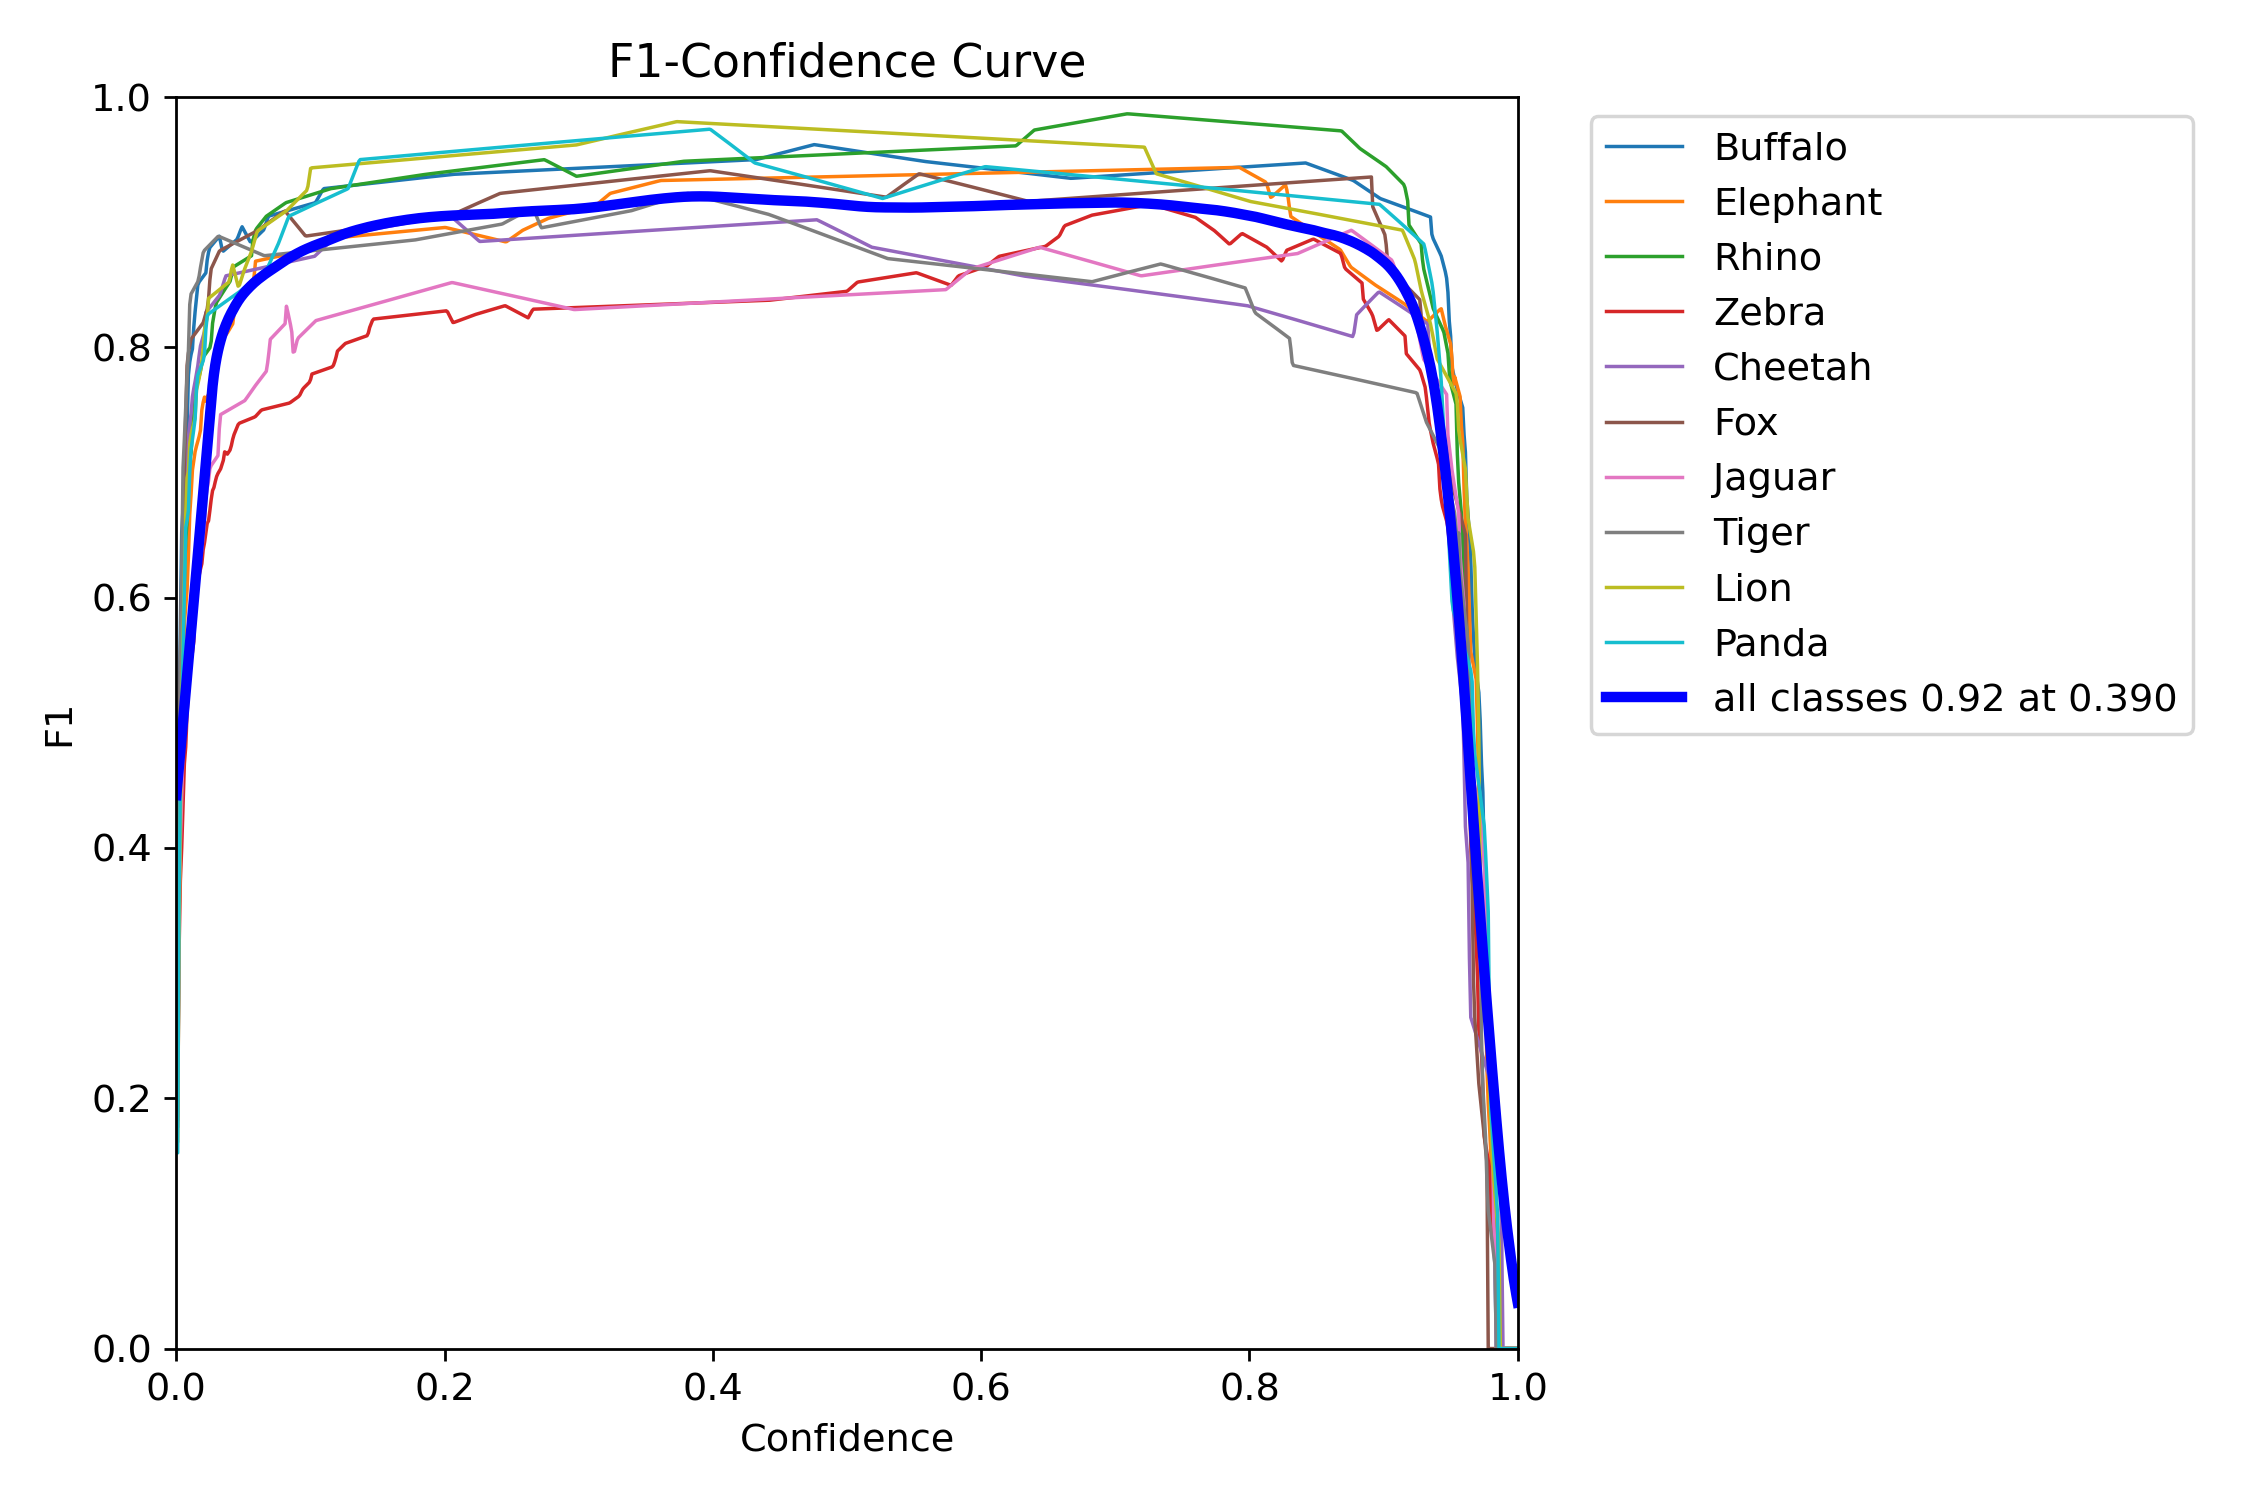

In [36]:
display(Image(filename="runs/detect/train/F1_curve.png", width=1000))

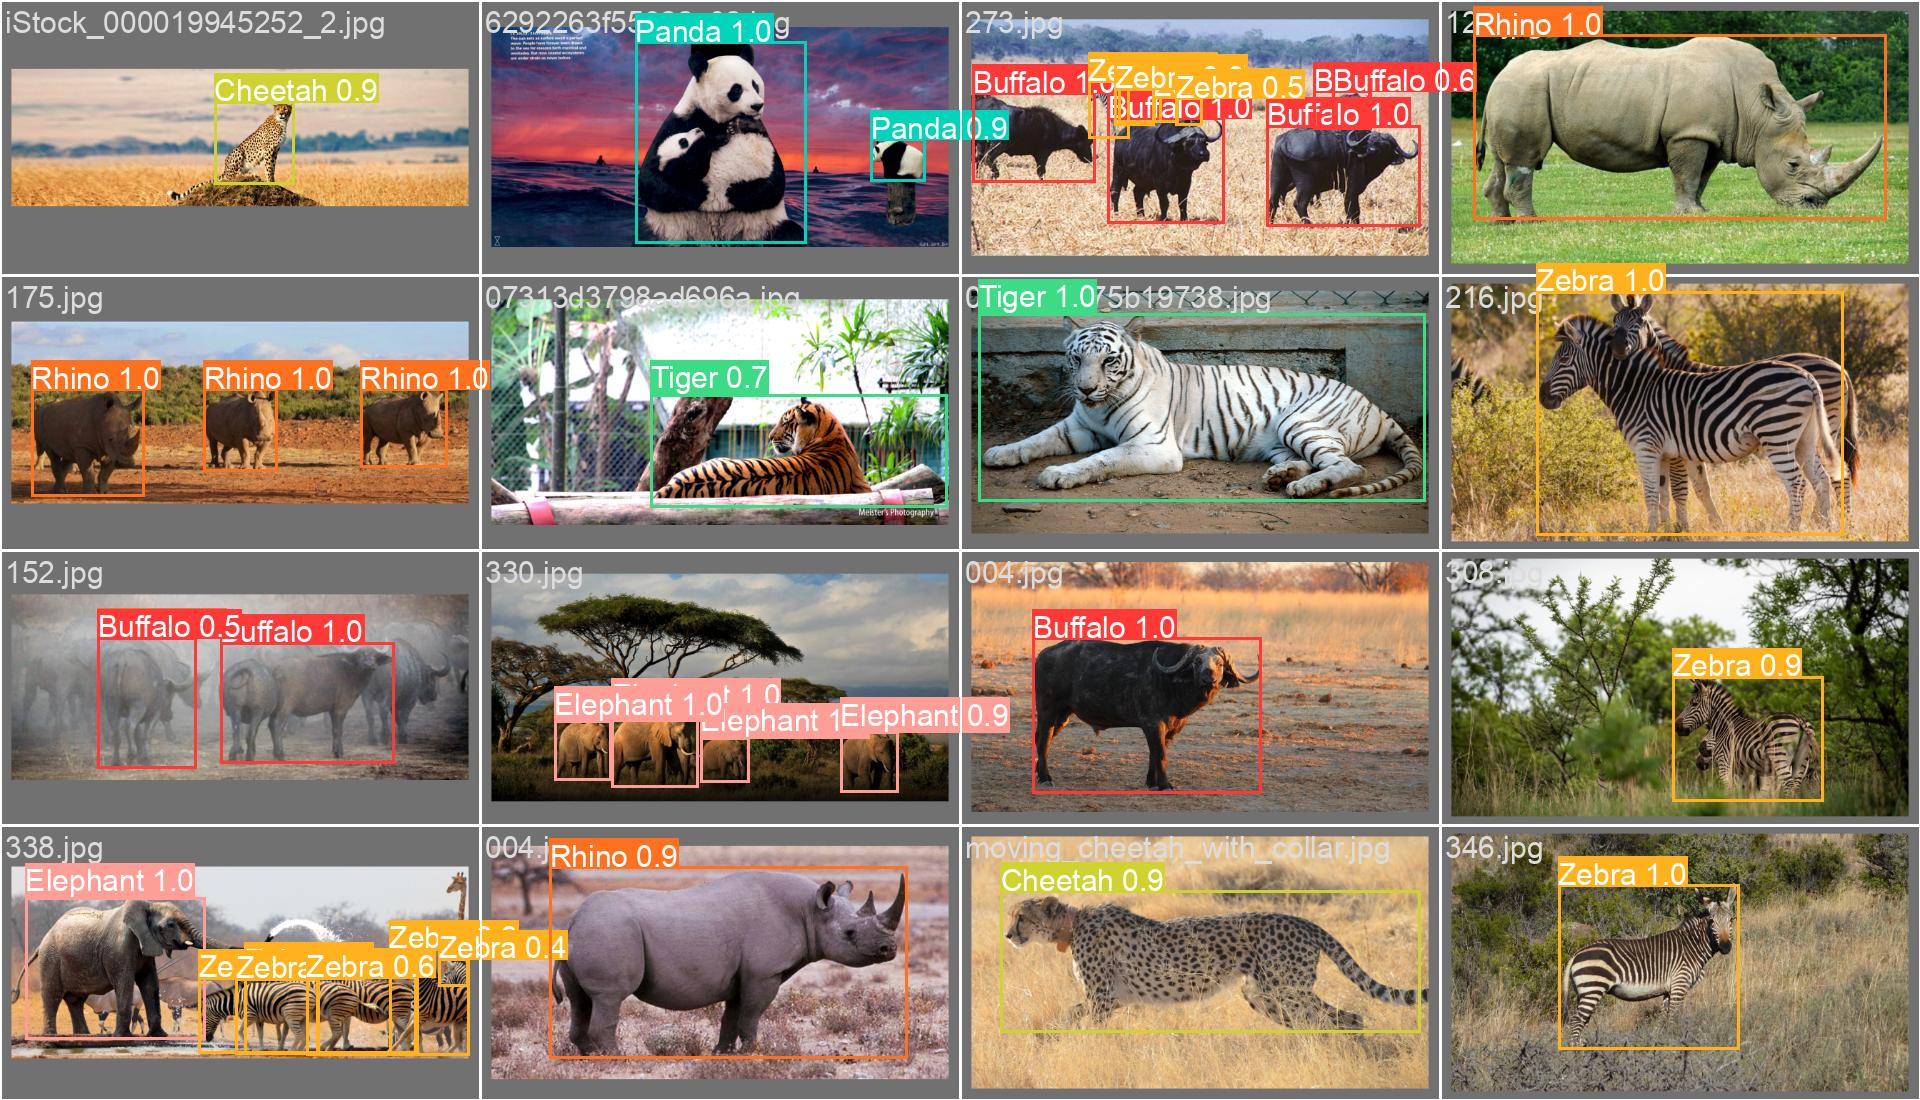

In [41]:
display(Image(filename="runs/detect/train/val_batch0_pred.jpg", width=1000))

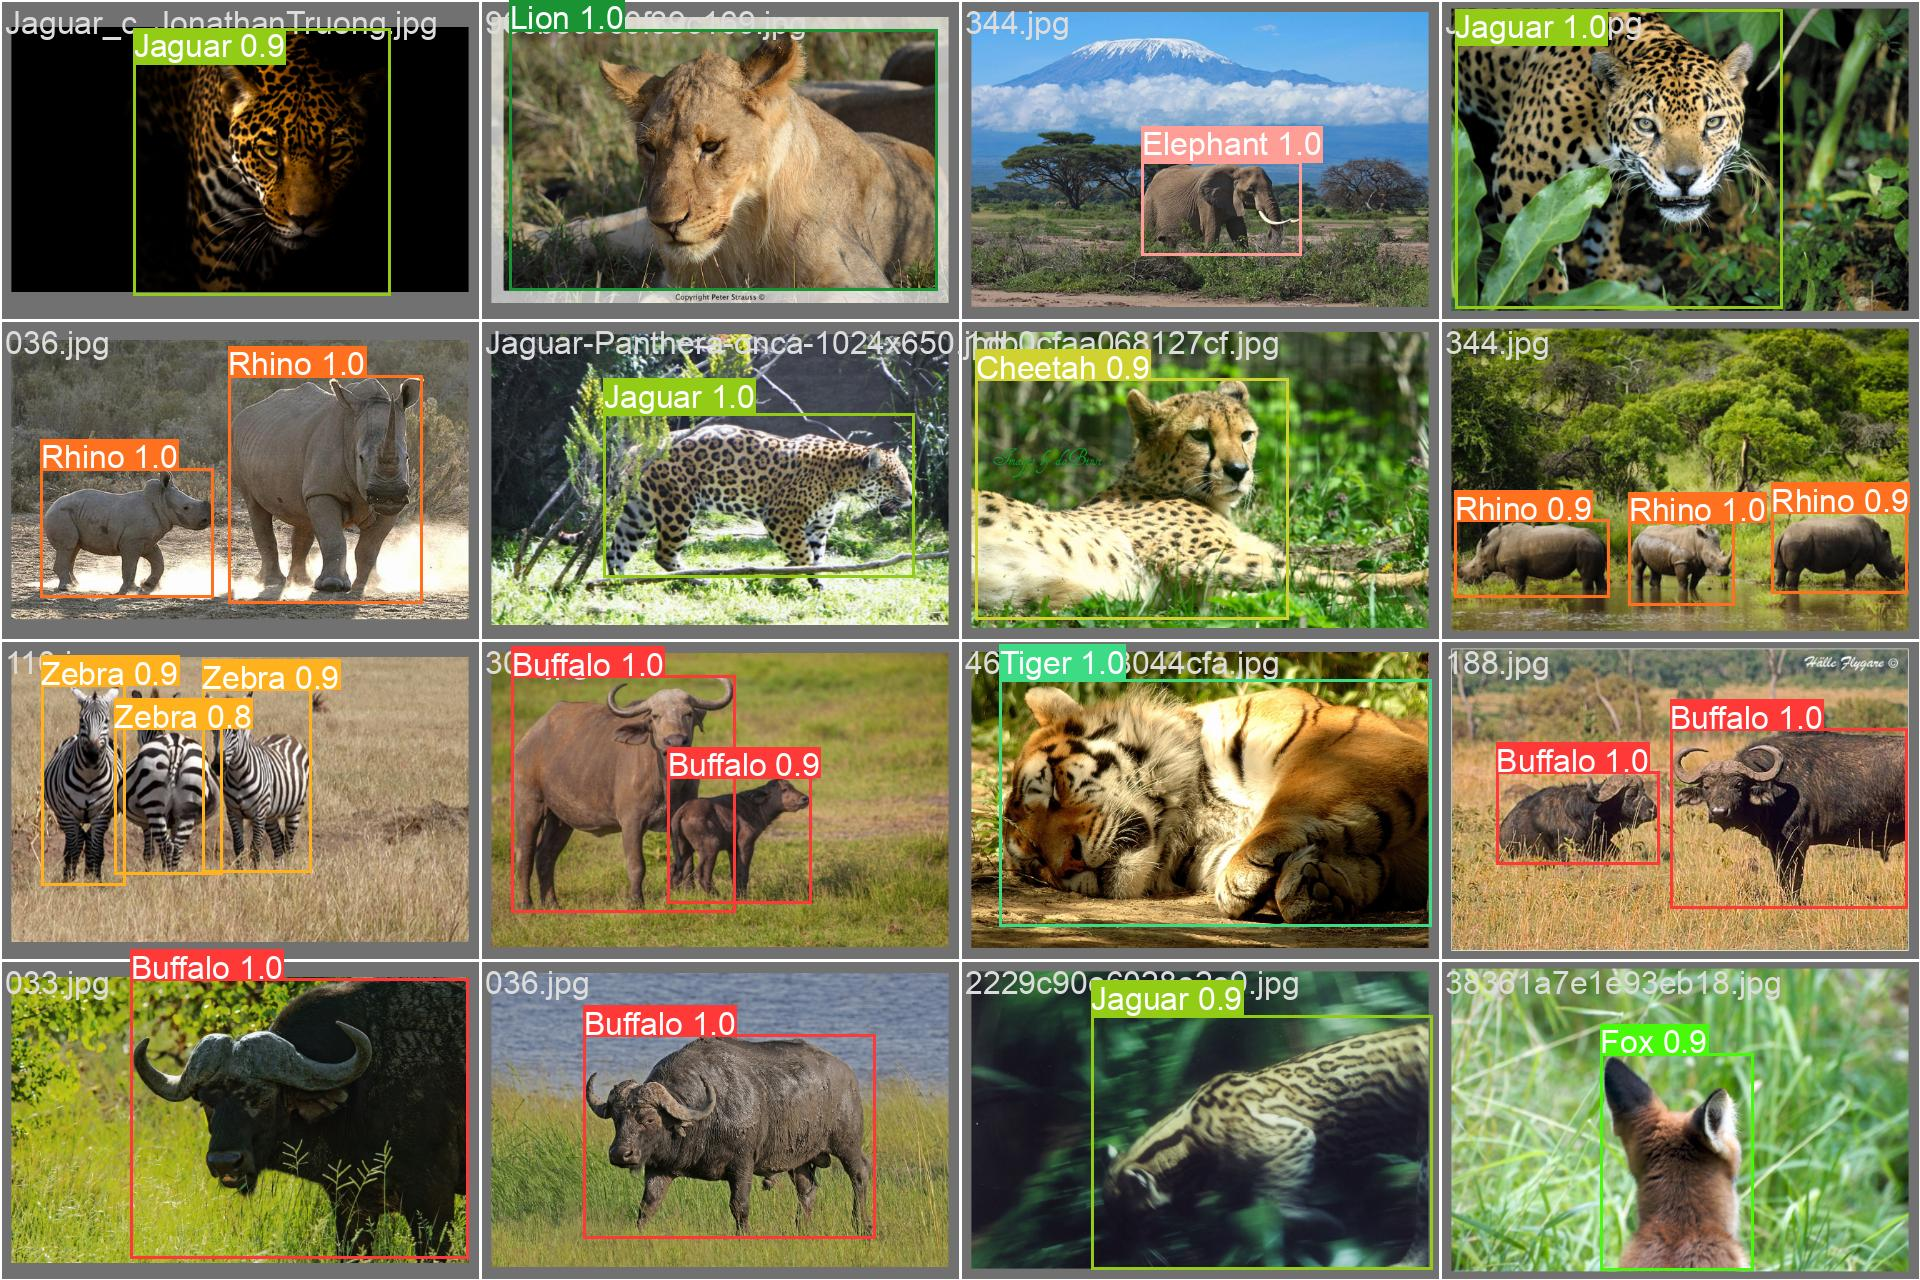

In [40]:
display(Image(filename="runs/detect/train/val_batch1_pred.jpg", width=1000))

## Evaluate the model

In [43]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=custom.yaml

Ultralytics YOLOv8.0.155 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients
val: Scanning /content/driver/MyDrive/Colab_Notebooks/Computer_Vision/Animal_Species_Detection/data/labels/val/buffalo.cache... 243 images, 0 backgrounds, 0 corrupt: 100% 243/243 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 16/16 [00:10<00:00,  1.58it/s]
                   all        243        329      0.907      0.938      0.965      0.824
               Buffalo        243         40      0.946       0.95      0.985       0.85
              Elephant        243         44      0.915      0.955      0.969        0.8
                 Rhino        243         38      0.926      0.974      0.993      0.886
                 Zebra        243         53      0.763      0.925      0.953      0.733
               Cheetah        243         26      0.909      0.885      0.922 

## Predict

In [55]:
for animal in os.listdir('./data/images/test'):
  test_path = os.path.join('data/images/test', animal)
  !yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.35 source="$test_path" save=True

Ultralytics YOLOv8.0.155 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients

image 1/5 /content/driver/MyDrive/Colab_Notebooks/Computer_Vision/Animal_Species_Detection/data/images/test/fox/018223ca6996812d.jpg: 608x640 1 Lion, 51.4ms
image 2/5 /content/driver/MyDrive/Colab_Notebooks/Computer_Vision/Animal_Species_Detection/data/images/test/fox/21c0c22e54c7f094.jpg: 448x640 1 Fox, 53.0ms
image 3/5 /content/driver/MyDrive/Colab_Notebooks/Computer_Vision/Animal_Species_Detection/data/images/test/fox/3e2ed8b93429719a.jpg: 448x640 1 Fox, 6.2ms
image 4/5 /content/driver/MyDrive/Colab_Notebooks/Computer_Vision/Animal_Species_Detection/data/images/test/fox/40052ba90561859c.jpg: 480x640 1 Fox, 52.8ms
image 5/5 /content/driver/MyDrive/Colab_Notebooks/Computer_Vision/Animal_Species_Detection/data/images/test/fox/881142e056b6892f.jpg: 448x640 1 Fox, 6.8ms
Speed: 2.6ms preprocess, 34.0ms inference, 21.1ms postprocess per

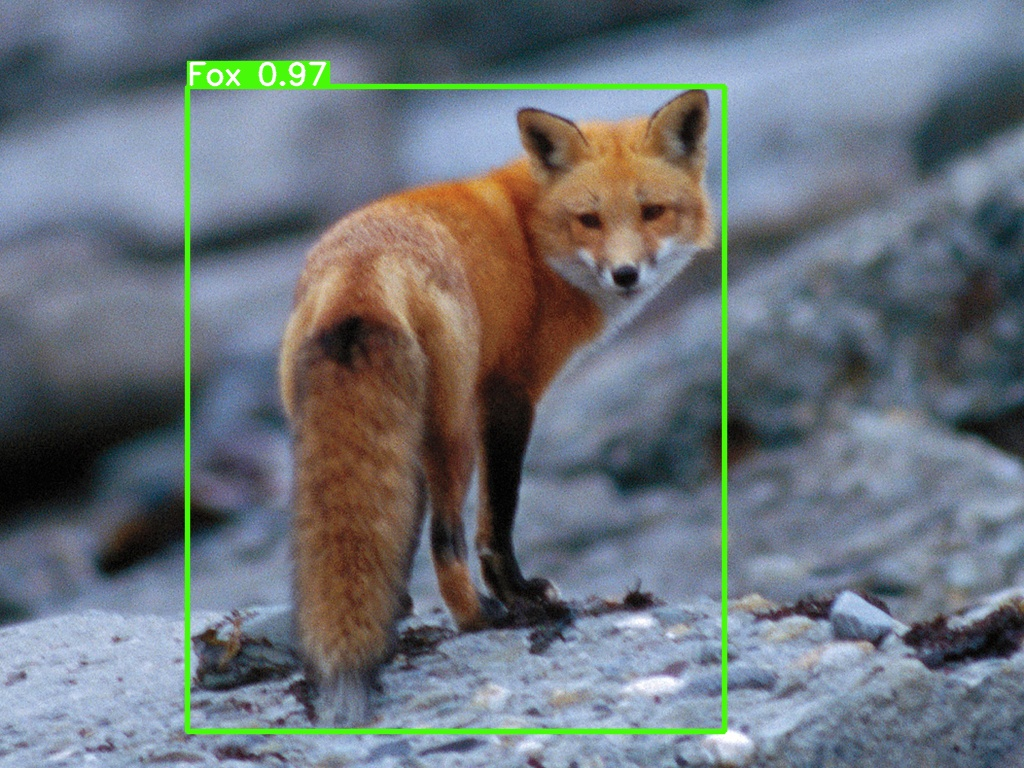

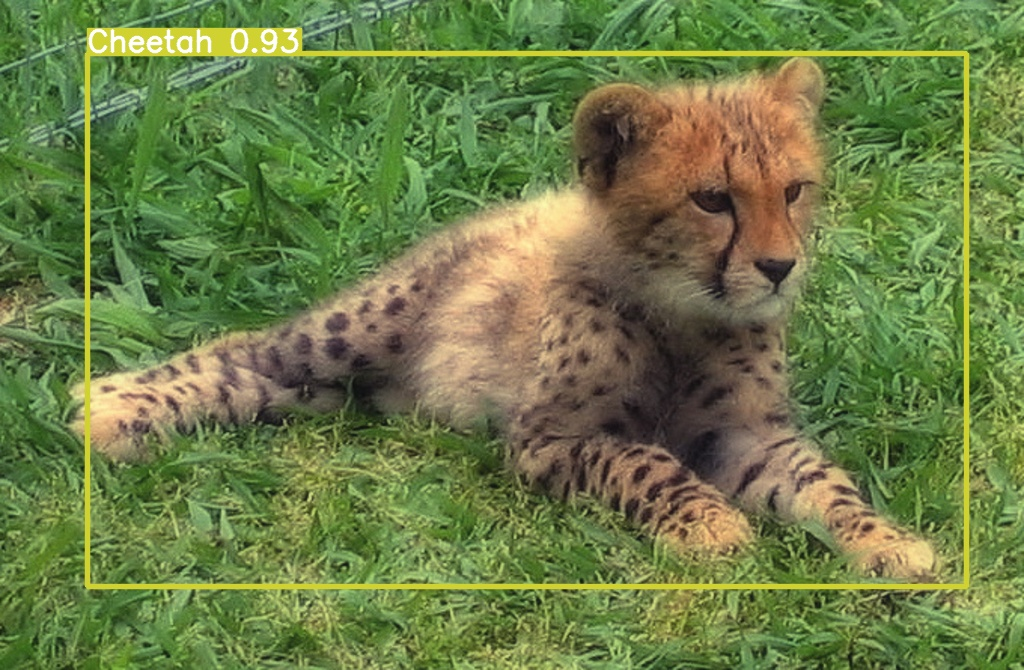

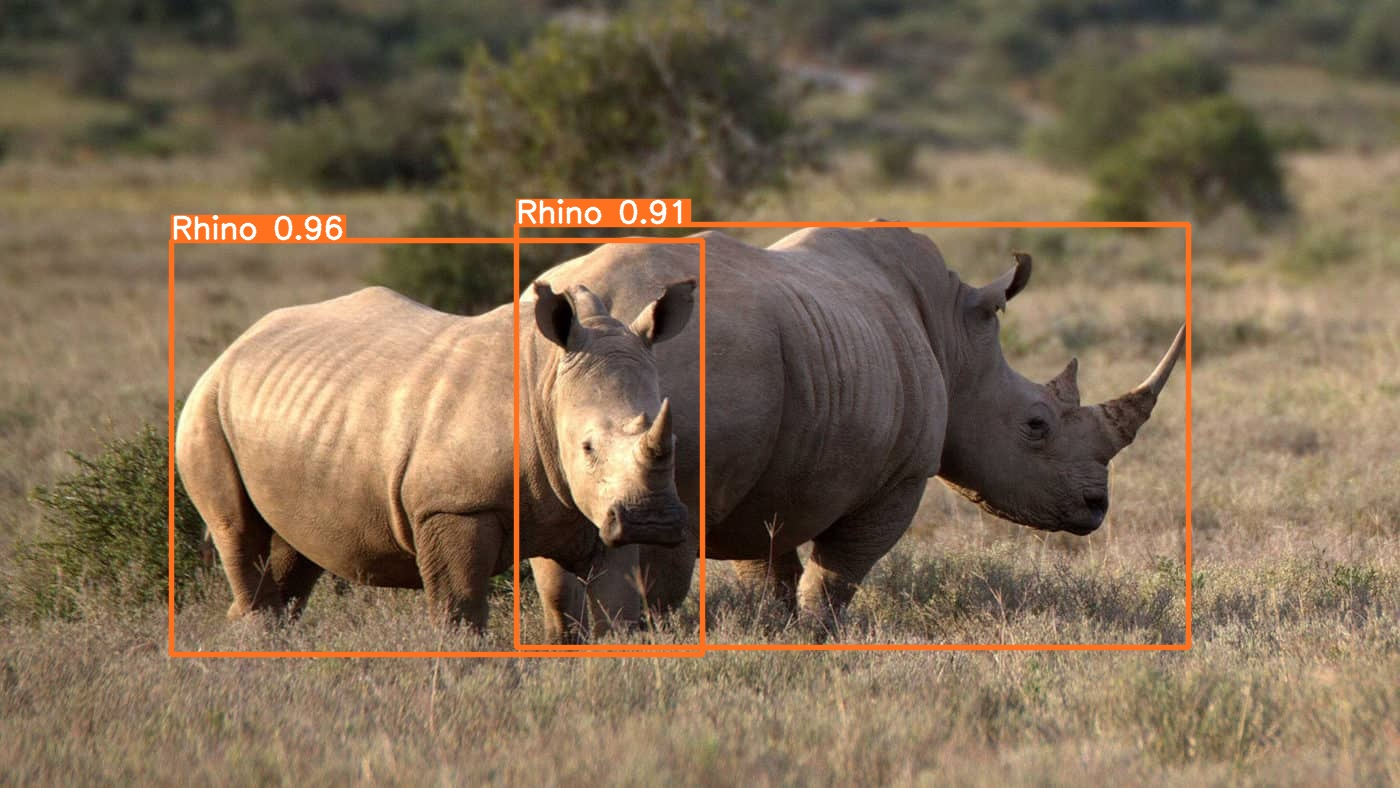

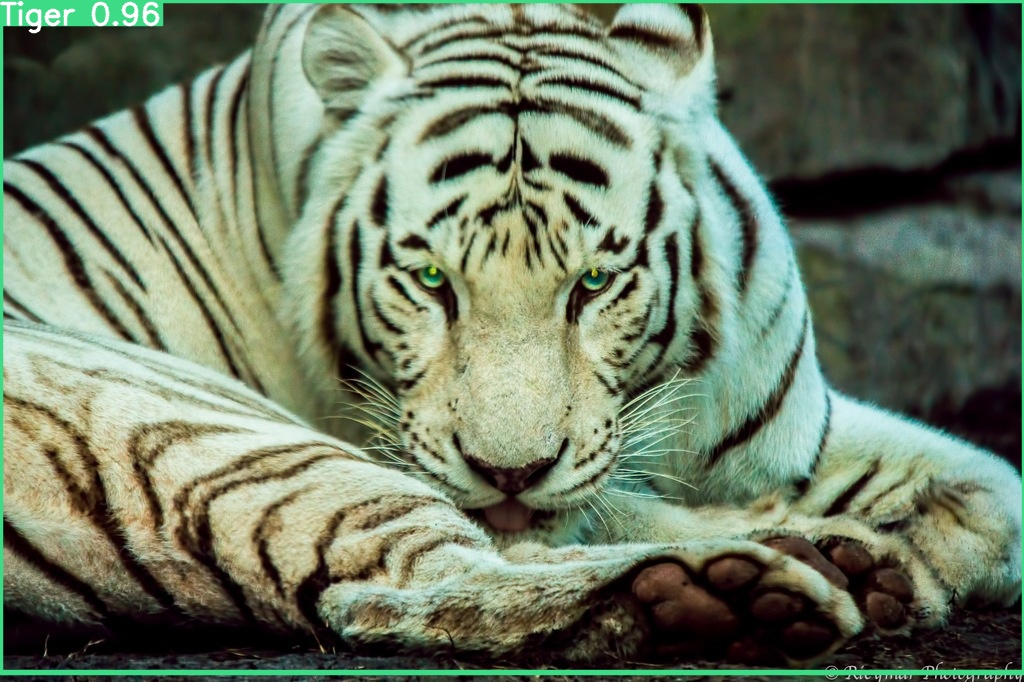

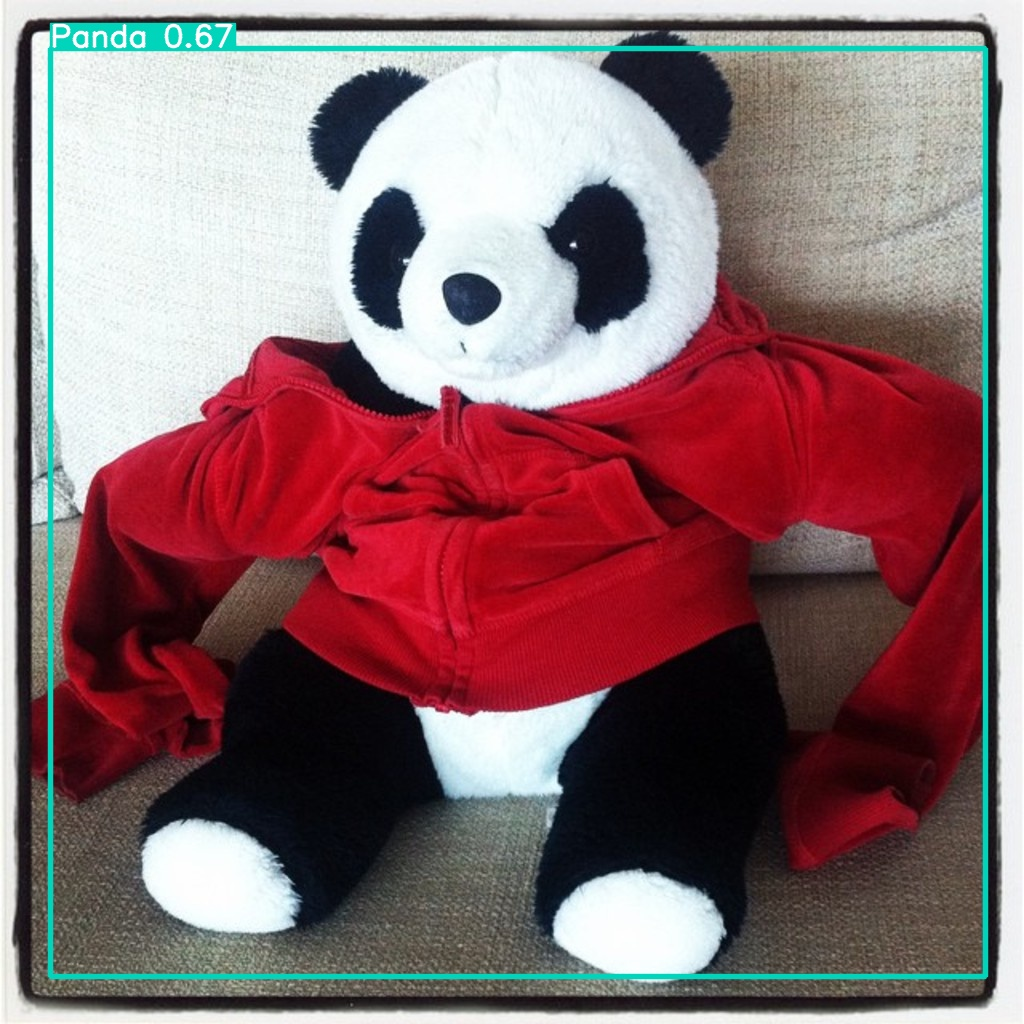

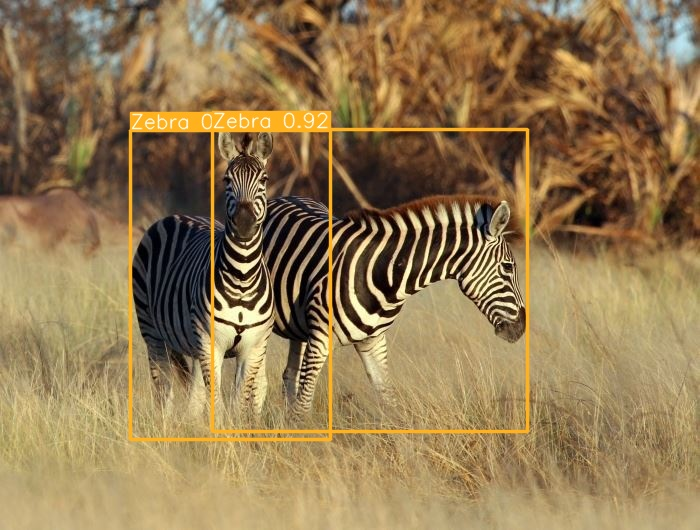

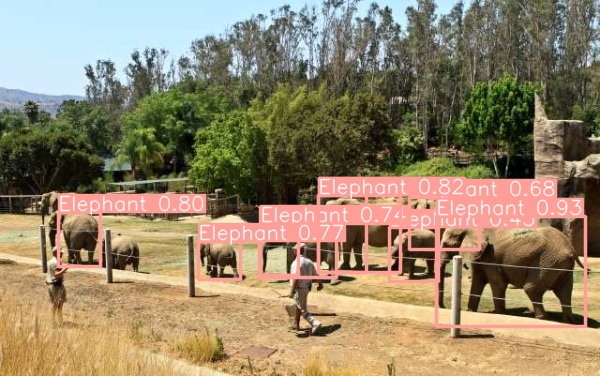

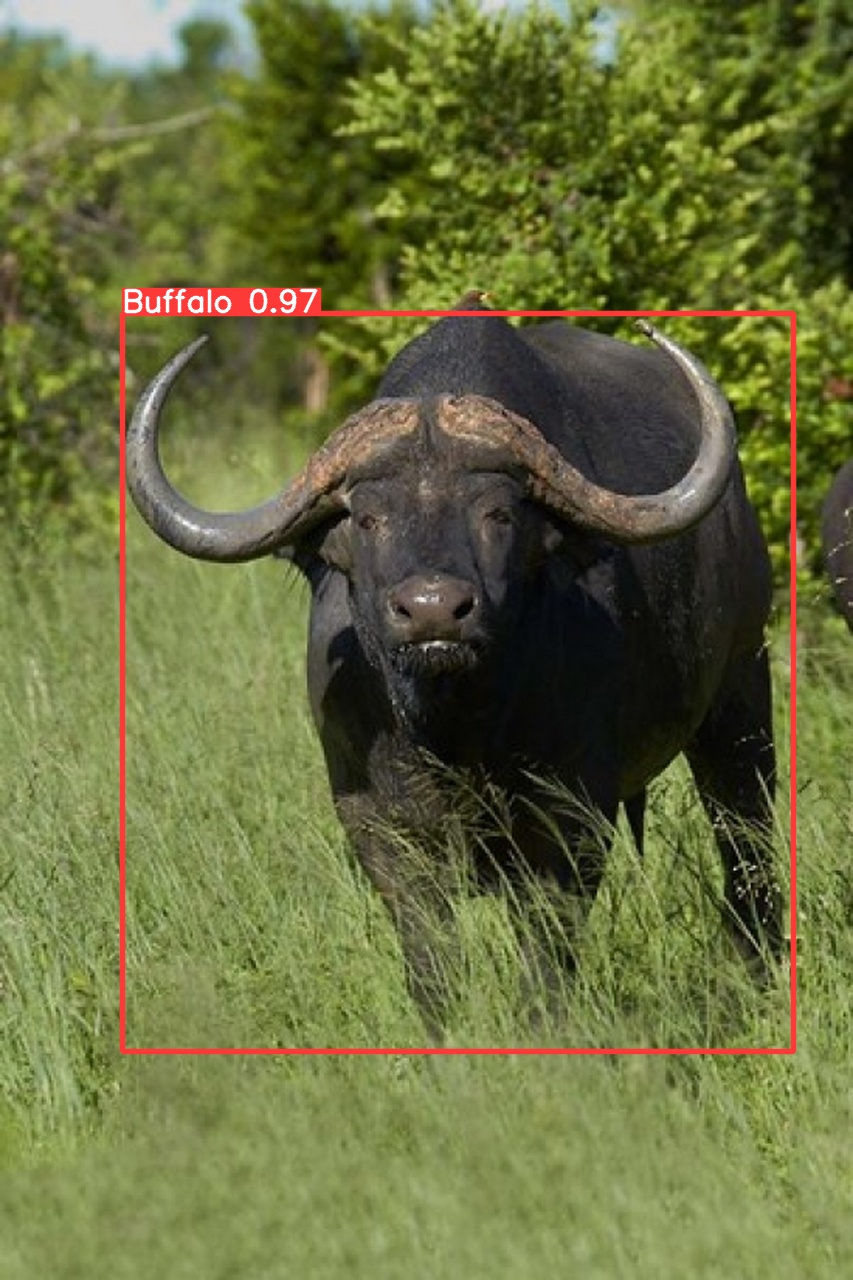

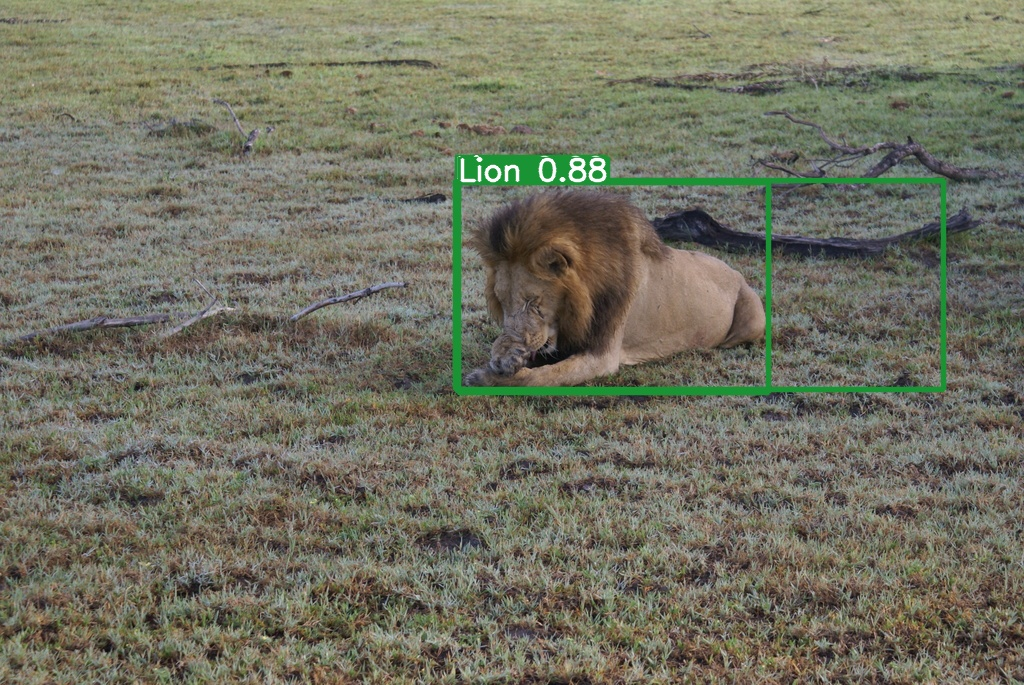

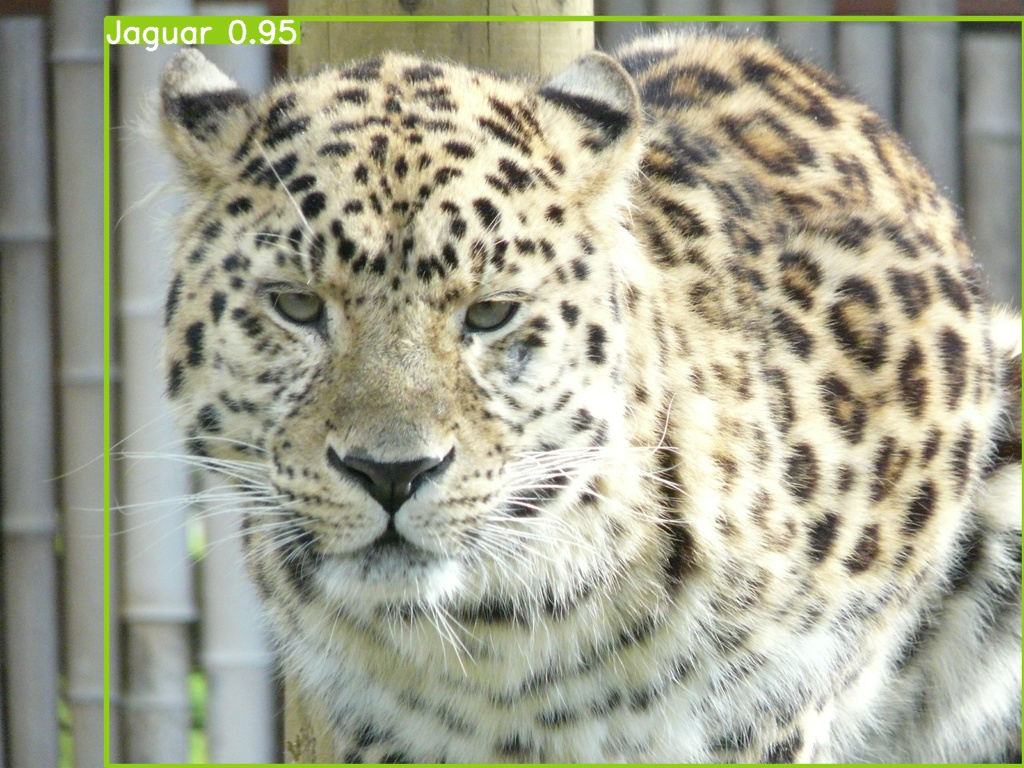

In [62]:
# for animal in sorted(os.listdir('./data/images/test')):
for i in range(1, 11):
  img_path = glob.glob(f'./runs/detect/predict{i}/*.jpg')[3]
  display(Image(filename=img_path, width=500))
  print('\n')

## Export

In [ ]:
!yolo export model=yolov8n_saved_model/yolov8n.h5 format=saved_model